In [155]:
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30,10)

# read the measurements file

In [156]:
data_frame = pd.read_csv("modem_sleep_no_traffic.csv", sep=" ", names=["time_ms", "current_mA"])
data_frame.describe()

,time_ms,current_mA
count,5877.000000,5877.000000
mean,12511.704952,37.945612
std,3532.986580,28.775624
min,6431.000000,17.268180
25%,9440.000000,17.395460
50%,12500.000000,17.418180
75%,15574.000000,77.463640
max,18646.000000,143.995450


In [157]:
def calc_AmpereSecFromDataFrame(df):
    return integrate.trapz(df.current_mA.div(1000), df.time_ms.div(1000))


def calc_load_coulomb_str(df):
    load = calc_AmpereSecFromDataFrame(df)
    return "Q = {:.4f} As".format(load)

# Modem sleep

/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


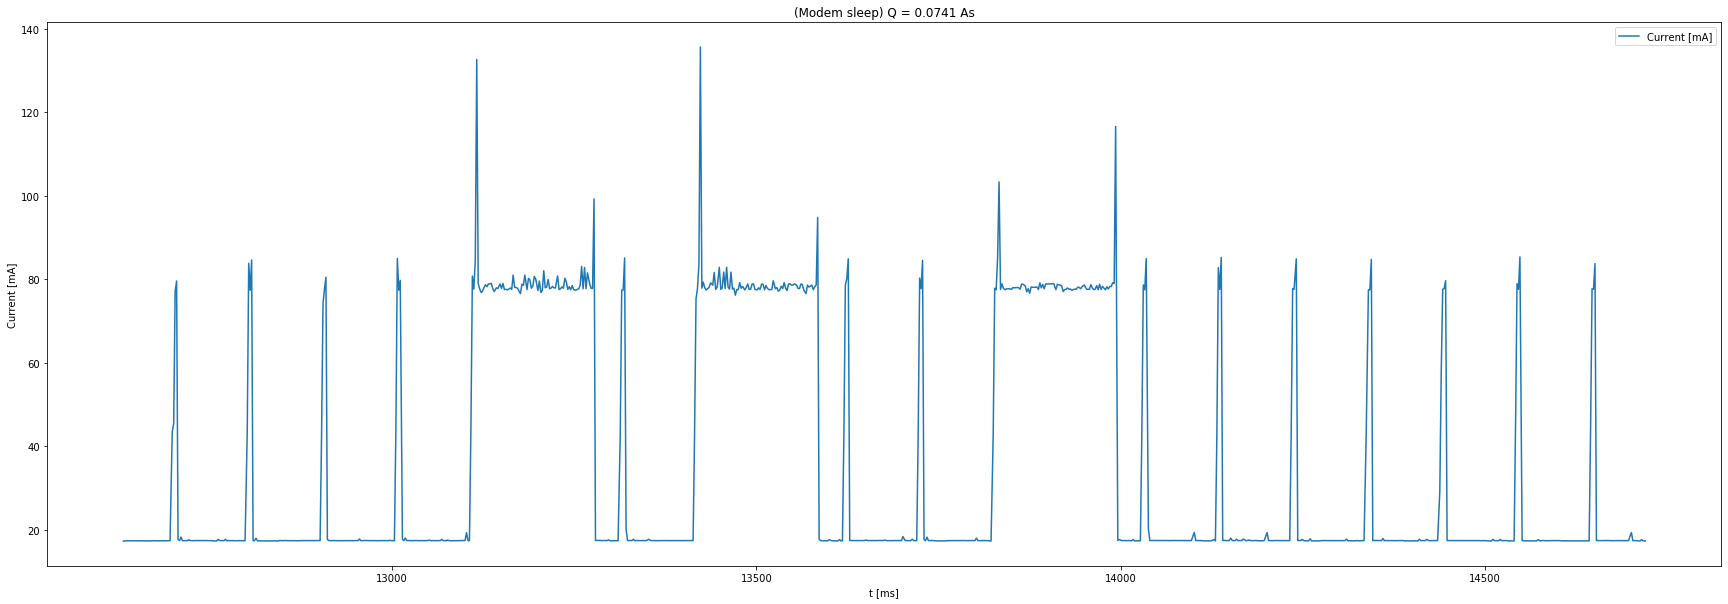

In [158]:
df_modem_sleep = data_frame[3000:4000]
plt.title("(Modem sleep) " + calc_load_coulomb_str(df_modem_sleep))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_modem_sleep.time_ms[:, None], df_modem_sleep.current_mA[:, None], label="Current [mA]")
plt.legend()
plt.show()

# Beacon interval

/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


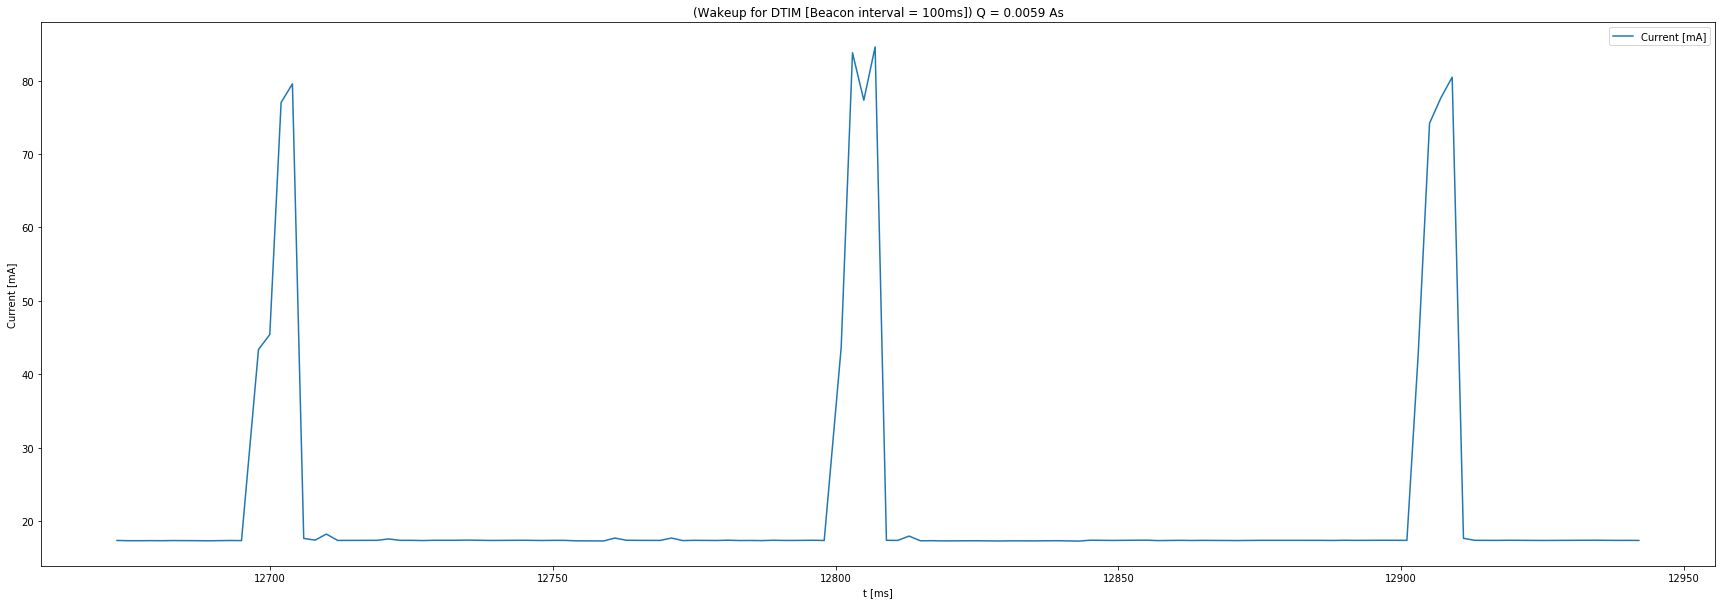

In [159]:
df_dtim = data_frame[3020:3150]
plt.title("(Wakeup for DTIM [Beacon interval = 100ms]) " + calc_load_coulomb_str(df_dtim))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_dtim.time_ms[:, None], df_dtim.current_mA[:, None], label="Current [mA]")
plt.legend()
plt.show()